In [11]:
import serial
import serial.tools.list_ports
import pandas as pd
import numpy as np

# Connect to the Nicla
ports = serial.tools.list_ports.comports()
for n in ports:
    # Print the names of the devices connected to the computer - your Nicla will be one of them.
    print(n.description)
    print(n.device)
    # If your computer is a Mac, you can use the following lines to automatically set the Serial port:
    # if 'Nicla' in n.description:
    #     dev = n.device

# You need to change the line below to the right Serial port for your Nicla:
dev = '/dev/cu.usbmodem7DFCC8692'

# See baudrate=115200 below? This is the speed at which the Nicla communicates with the computer. Don't change it.
nicla = serial.Serial(port=dev, baudrate=115200, timeout=.1)

n/a
/dev/cu.wlan-debug
n/a
/dev/cu.Bluetooth-Incoming-Port
n/a
/dev/cu.BoseQuietComfort35
Nicla Sense CMSIS-DAP
/dev/cu.usbmodem7DFCC8692


In [12]:
# Number of readings to take
n_readings = 1000
column_titles = ['time', 'temp', 'pressure', 'gas']

# Clear the buffer for the Nicla serial port - it may help to comment these 2 lines out, it may help to keep them!
nicla.flush()
nicla.reset_input_buffer()

# Start collecting data - tell the Nicla how many data points to take
nicla.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

# Create somewhere to store the data
data_table = np.zeros((n_readings, len(column_titles)))
# Uncomment the line below if you'd like to see what the data_table looks like - google "numpy zeros" to learn what the function is doing.
# print(data_table)

# Get the data from the Nicla
for n in range(n_readings):
    # Read data from the Nicla up to '/n'
    data = nicla.readline()
    # Split the line read from the Nicla every time it finds a ','
    data = np.fromstring(data, sep=',')
    # Unless the data has the correct length, ignore it
    if len(data) == len(column_titles):
        data_table[n,:] = data

# Close the serial port
nicla.close()

# Put the data in a DataFrame
tpg_data = pd.DataFrame(data_table, columns=column_titles)
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
995,3284.0,29.48,1011.14,17794.0
996,3287.0,29.48,1011.14,17794.0
997,3290.0,29.48,1011.14,17794.0
998,3293.0,29.48,1011.14,17794.0


In [13]:
# Number of readings to take
n_readings = 200
column_titles = ['time', 'temp', 'pressure', 'gas']

# Clear the buffer for the Nicla serial port - it may help to comment these 2 lines out, it may help to keep them!
nicla.open()
nicla.flush()
nicla.reset_input_buffer()

# Start collecting data - tell the Nicla how many data points to take
nicla.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

# Create somewhere to store the data
data_table = np.zeros((n_readings, len(column_titles)))
# Uncomment the line below if you'd like to see what the data_table looks like - google "numpy zeros" to learn what the function is doing.
# print(data_table)

# Get the data from the Nicla
for n in range(n_readings):
    # Read data from the Nicla up to '/n'
    data = nicla.readline()
    # # Split the line read from the Nicla every time it finds a ','
    data = np.fromstring(data, sep=',')
    # # Unless the data has the correct length, ignore it
    if len(data) == len(column_titles):
        data_table[n,:] = data

# Close the serial port
nicla.close()

# Put the data in a DataFrame
tpg_data = pd.DataFrame(data_table, columns=column_titles)
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
195,578.0,29.53,1011.18,17704.0
196,581.0,29.53,1011.18,17704.0
197,584.0,29.53,1011.18,17704.0
198,587.0,29.53,1011.18,17704.0


In [14]:
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
195,578.0,29.53,1011.18,17704.0
196,581.0,29.53,1011.18,17704.0
197,584.0,29.53,1011.18,17704.0
198,587.0,29.53,1011.18,17704.0


In [15]:
tpg_data['temp']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
195    29.53
196    29.53
197    29.53
198    29.53
199    29.53
Name: temp, Length: 200, dtype: float64

In [16]:
data_filtered = tpg_data[['time', 'temp']]
data_filtered

,time,temp
0,0.0,0.00
1,0.0,0.00
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
195,578.0,29.53
196,581.0,29.53
197,584.0,29.53
198,587.0,29.53


In [17]:
tpg_data[tpg_data['temp'] > 0]

,time,temp,pressure,gas
9,0.0,29.50,1011.11,17824.0
10,5.0,29.52,1011.15,17764.0
11,7.0,29.52,1011.15,17764.0
12,11.0,29.52,1011.15,17764.0
13,14.0,29.52,1011.15,17764.0
...,...,...,...,...
195,578.0,29.53,1011.18,17704.0
196,581.0,29.53,1011.18,17704.0
197,584.0,29.53,1011.18,17704.0
198,587.0,29.53,1011.18,17704.0


In [18]:
data_exercise1 = tpg_data
data_exercise1

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
195,578.0,29.53,1011.18,17704.0
196,581.0,29.53,1011.18,17704.0
197,584.0,29.53,1011.18,17704.0
198,587.0,29.53,1011.18,17704.0


In [19]:
# this will return the first 3 rows of the DataFrame data_exercise - note that Python starts counting from 0 and ignore the last number you're requesting here.
data_exercise1.iloc[0:3]

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [21]:
# this will return rows that have an index with a value between 0 and 20 - again, Python starts at 0, but keeps you on your toes by including the last number you're requesting.
data_exercise1.loc[0:20]

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
5,0.0,0.00,0.00,0.0
6,0.0,0.00,0.00,0.0
7,0.0,0.00,0.00,0.0
8,0.0,0.00,0.00,0.0
9,0.0,29.50,1011.11,17824.0


In [22]:
data_exercise2 = tpg_data[tpg_data['temp'] > 0]
data_exercise2

,time,temp,pressure,gas
9,0.0,29.50,1011.11,17824.0
10,5.0,29.52,1011.15,17764.0
11,7.0,29.52,1011.15,17764.0
12,11.0,29.52,1011.15,17764.0
13,14.0,29.52,1011.15,17764.0
...,...,...,...,...
195,578.0,29.53,1011.18,17704.0
196,581.0,29.53,1011.18,17704.0
197,584.0,29.53,1011.18,17704.0
198,587.0,29.53,1011.18,17704.0


In [23]:
data_exercise2.iloc[0:5]

,time,temp,pressure,gas
9,0.0,29.50,1011.11,17824.0
10,5.0,29.52,1011.15,17764.0
11,7.0,29.52,1011.15,17764.0
12,11.0,29.52,1011.15,17764.0
13,14.0,29.52,1011.15,17764.0


In [24]:
data_exercise2.loc[0:13]

,time,temp,pressure,gas
9,0.0,29.50,1011.11,17824.0
10,5.0,29.52,1011.15,17764.0
11,7.0,29.52,1011.15,17764.0
12,11.0,29.52,1011.15,17764.0
13,14.0,29.52,1011.15,17764.0


In [25]:
tpg_data

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
...,...,...,...,...
195,578.0,29.53,1011.18,17704.0
196,581.0,29.53,1011.18,17704.0
197,584.0,29.53,1011.18,17704.0
198,587.0,29.53,1011.18,17704.0


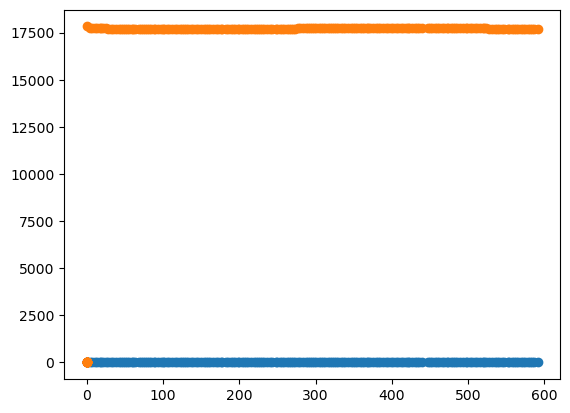

In [26]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False    # Remove annoying auto-offset
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()
# Add an axis to the figure
ax = fig.add_subplot(111)
# Tell the axis to plot the data - time on the x-axis, temperature on the y-axis
ax.scatter(tpg_data['time'], tpg_data['temp'])
# Tell the axis to plot the data - time on the x-axis, gas reading on the y-axis
ax.scatter(tpg_data['time'], tpg_data['gas'])
# Show the figure - not strictly necessary in jupyter notebook, but essential if you're writing a .py file
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/kf/91ky3y3s4qv8fmwqp9xsm_hm0000gn/T/ipykernel_1148/1345782934.py:8: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')


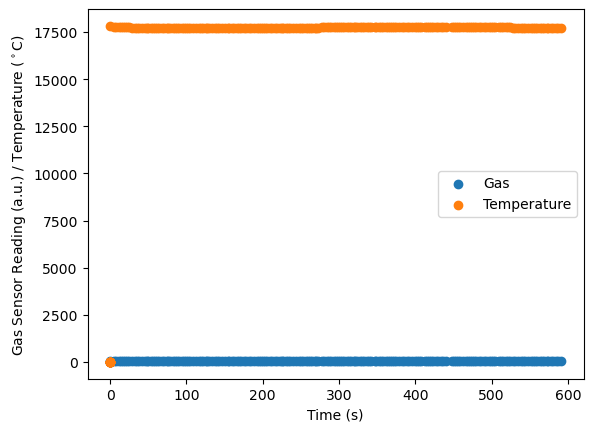

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'])
ax.scatter(tpg_data['time'], tpg_data['gas'])

# Add some labels and a legend to the plot
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')
plt.legend(['Gas', 'Temperature'])
plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
/var/folders/kf/91ky3y3s4qv8fmwqp9xsm_hm0000gn/T/ipykernel_1148/1735997784.py:4: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Temperature ($^\circ$C)')


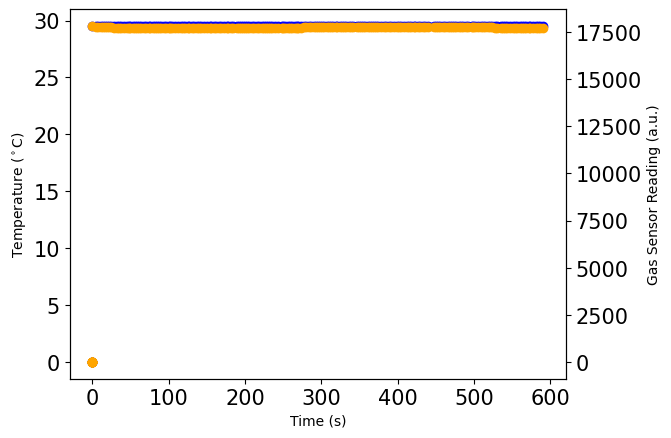

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel('Temperature ($^\circ$C)')
plt.tick_params(axis='both', labelsize=15) 

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel('Gas Sensor Reading (a.u.)')
# Set font size for tick labels
plt.tick_params(axis='both', labelsize=15)  

ax.set_xlabel('Time (s)')
plt.tick_params(axis='both', labelsize=15)  

plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/var/folders/kf/91ky3y3s4qv8fmwqp9xsm_hm0000gn/T/ipykernel_1148/1020107753.py:5: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Temperature ($^\circ$C)')


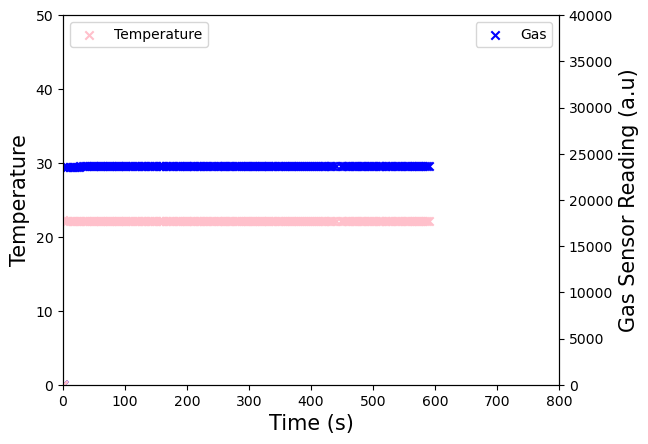

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue',marker='x')
ax.set_ylabel('Temperature ($^\circ$C)')


# Add a second y-axis to the plot              
ax2 = ax.twinx()

# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='pink',marker='x')

# Set font size for tick labels
ax.set_xlabel('Time (s)', fontsize=15)         
ax.set_ylabel('Temperature', fontsize=15)
ax2.set_ylabel('Gas Sensor Reading (a.u)', fontsize=15)

ax.set_xlim(0, 800)  
ax.set_ylim(0,50)  
ax2.set_ylim(0,40000)


ax.legend(['Gas'],fontsize=10, loc='upper right')
ax2.legend(['Temperature'],fontsize=10,loc='upper left')
plt.show()



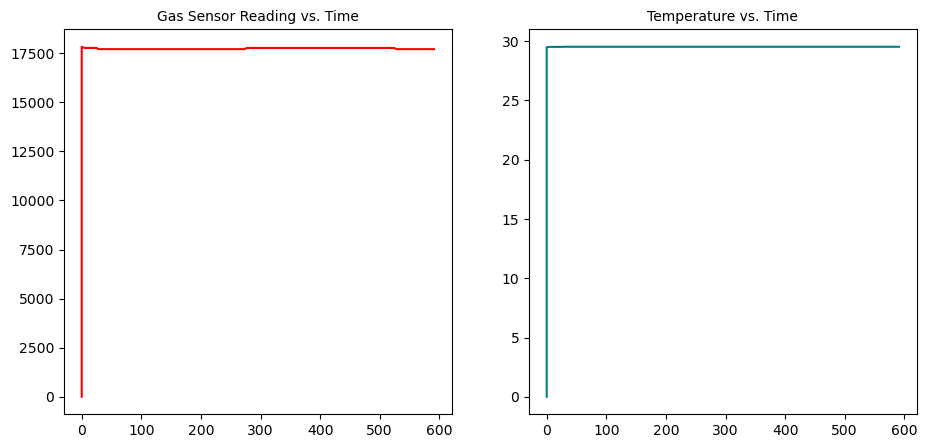

In [34]:
fig = plt.figure(figsize=(11,5))
# Create a subplot with 1 row and 2 columns - ax1 is in position 1
ax1 = fig.add_subplot(121)
# Create a subplot with 1 row and 2 columns - ax2 is in position 2
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
ax1.plot(tpg_data['time'], tpg_data['gas'], c=(1.0, 0.0, 0.0))
ax1.set_title('Gas Sensor Reading vs. Time',fontsize=10)

ax2.plot(tpg_data['time'], tpg_data['temp'], c=(0.0, 0.5, 0.5))
ax2.set_title('Temperature vs. Time',fontsize=10)

plt.show()

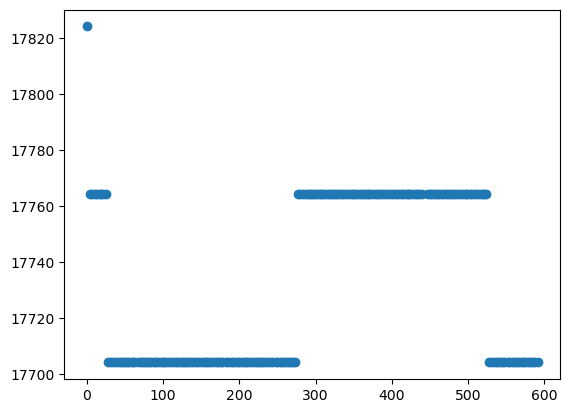

In [35]:
tpg_data_filter = tpg_data[tpg_data['gas'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data_filter['time'], tpg_data_filter['gas'])
plt.show()

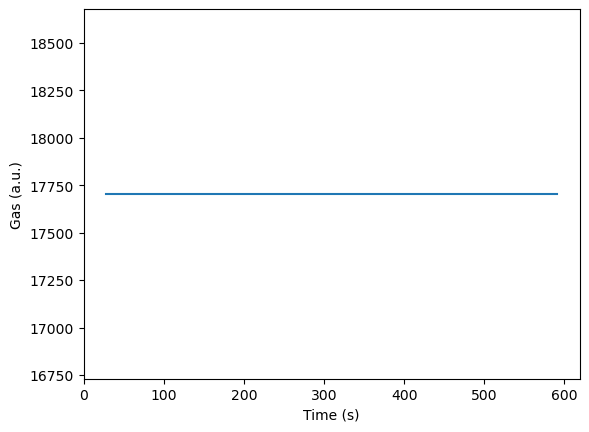

In [36]:
lower_bound = tpg_data['gas'].quantile(0.01)
upper_bound = tpg_data['gas'].quantile(0.99)

# Here's the tricky bit - we ignore values that are below the lower bound or above the upper bound - ask ChatGPT what the code is doing!
data_clean = tpg_data[(tpg_data['gas'] > lower_bound) & (tpg_data['gas'] < upper_bound)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data_clean['time'], data_clean['gas'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas (a.u.)')
plt.show()